In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [4]:
print(boston.data.shape)

(506, 13)


In [5]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
import pandas as pd
bos = pd.DataFrame(boston.data)

In [8]:
bos.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [9]:
bos.columns = boston.feature_names
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [10]:
print(boston.target.shape)

(506,)


In [11]:
bos['Price'] = boston.target
bos.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [12]:
# split the dependent and independent variable
X = bos.drop("Price",1)   #Feature Matrix
y = bos["Price"]          #Target Variable
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
df1 = bos.copy()

###### We will perform everything on df1 so that our old data remains safe.

#### Step1 : Create Linear Regression Model

In [14]:
X = df1.drop('Price',axis=1)
y = df1.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 05 Nov 2019   Prob (F-statistic):          6.95e-135
Time:                        14:10:42   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Step 2 : Construct residual Plot

In [15]:
#residual plot
sns.set(style = 'whitegrid')

df1['predictions'] = model.predict(X_constant)
residuals = model.resid
residuals

0      -6.008213
1      -3.429861
2       4.129768
3       4.791859
4       8.257118
5       3.440600
6      -0.104340
7       7.565244
8       4.983035
9      -0.019815
10     -3.995827
11     -2.689709
12      0.794651
13      0.844641
14     -1.083796
15      0.599998
16      2.571100
17      0.590325
18      4.029326
19     -0.207816
20      1.079595
21      1.928954
22     -0.629349
23      0.696317
24     -0.077081
25      0.520836
26      1.137412
27      0.101364
28     -1.145185
29      0.126901
         ...    
476    -3.828357
477     0.457095
478    -4.603875
479    -0.468206
480    -0.470522
481    -3.400345
482    -3.570648
483     0.716012
484     1.150947
485    -1.018922
486    -0.554231
487    -0.724671
488     3.337686
489    -1.222606
490     4.441748
491    -0.162760
492     4.162191
493     1.172699
494     3.889646
495     6.219520
496     5.689828
497    -0.808255
498    -0.097207
499    -0.955242
500    -3.667642
501    -1.132617
502    -1.778698
503    -3.7293

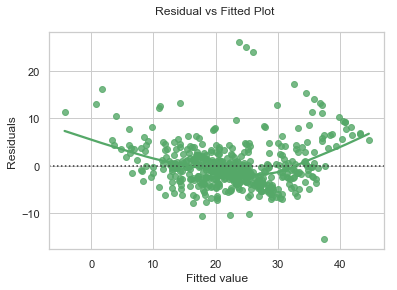

In [16]:
ax = sns.residplot(df1.predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


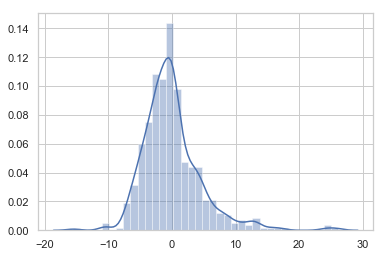

In [17]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)

#### Step 3 : If the residual plot is normal then compute the R2 value, do not transform. If it is not normal then go for transformation. As, here the residual plot is normal so no need of transformation.

###### If suppose this residual plot have not been normal then we would have gone with transformation techniques. Let's see few transformation techniques.

In [18]:
## old data
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
## for sqrt(X)
df2 = bos.copy()
final_df = df2.transform(lambda x: x**0.5)
final_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.079498,4.242641,1.519868,0.0,0.733485,2.564176,8.074652,2.022375,1.000000,17.204651,3.911521,19.922349,2.231591,4.898979
1,0.165257,0.000000,2.658947,0.0,0.684836,2.533969,8.882567,2.228699,1.414214,15.556349,4.219005,19.922349,3.023243,4.647580
2,0.165197,0.000000,2.658947,0.0,0.684836,2.680485,7.816649,2.228699,1.414214,15.556349,4.219005,19.819939,2.007486,5.890671
3,0.179917,0.000000,1.476482,0.0,0.676757,2.645373,6.767570,2.462154,1.732051,14.899664,4.324350,19.865296,1.714643,5.779273
4,0.262774,0.000000,1.476482,0.0,0.676757,2.673387,7.362065,2.462154,1.732051,14.899664,4.324350,19.922349,2.308679,6.016644


#### Step 4 : Apply Regression

In [20]:
X = final_df.drop('Price',axis=1)
y = final_df.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     150.4
Date:                Tue, 05 Nov 2019   Prob (F-statistic):          6.52e-162
Time:                        14:10:45   Log-Likelihood:                -278.31
No. Observations:                 506   AIC:                             584.6
Df Residuals:                     492   BIC:                             643.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1623      0.908     11.189      0.000       8.378      11.947
CRIM          -0.1477      0.026     -5.595      0.000      -0.200      -0.096
ZN             0.0151      0.010      1.475      0.141      -0.005       0.035
INDUS         -0.0155      0.035     -0.438      0.662      -0.085       0.054
CHAS           0.2385      0.077      3.078      0.002       0.086       0.391
NOX           -2.8298      0.558     -5.070      0.000      -3.926      -1.733
RM             1.0626      0.192      5.547      0.000       0.686       1.439
AGE            0.0120      0.016      0.731      0.465      -0.020       0.044
DIS           -0.6473      0.081     -8.031      0.000      -0.806      -0.489
RAD            0.2408      0.037      6.492      0.000       0.168       0.314
TAX           -0.0448      0.012     -3.786      0.000      -0.068      -0.022
PTRATIO       -0.7348      0.099     -7.421      0.000      -0.929      -0.540
B              0.0220      0.006      3.621      0.000       0.010       0.034
LSTAT         -0.5296      0.034    -15.362      0.000      -0.597      -0.462
==============================================================================
Omnibus:                       81.521   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.866
Skew:                           0.808   Prob(JB):                     2.68e-46
Kurtosis:                       5.710   Cond. No.                     1.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#residual plot
sns.set(style = 'whitegrid')

df2['predictions'] = model.predict(X_constant)
residuals = model.resid
residuals

0     -0.581594
1     -0.248578
2      0.315880
3      0.181876
4      0.707950
5      0.165622
6      0.074084
7      0.954935
8      0.541759
9      0.104956
10    -0.274823
11    -0.217613
12     0.217716
13     0.063827
14    -0.087070
15     0.025626
16     0.230686
17     0.164321
18     0.397845
19    -0.018192
20     0.116929
21     0.313088
22     0.086191
23     0.134949
24     0.061844
25     0.000960
26     0.158916
27     0.075670
28     0.050262
29     0.237877
         ...   
476   -0.176170
477    0.040445
478   -0.294145
479    0.210924
480    0.141932
481   -0.178796
482   -0.169191
483    0.119805
484    0.216444
485    0.056025
486    0.163369
487    0.044195
488    0.180018
489   -0.705801
490   -0.102795
491   -0.146879
492    0.394973
493    0.065511
494    0.441396
495    0.707997
496    0.593762
497   -0.087285
498    0.008314
499   -0.176173
500   -0.391778
501    0.071750
502   -0.127382
503   -0.323666
504   -0.331796
505   -1.262795
Length: 506, dtype: floa

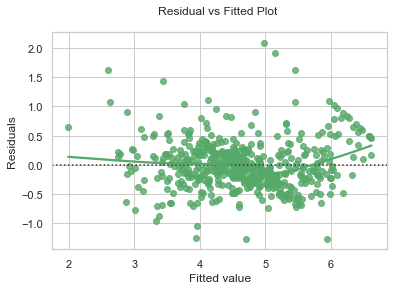

In [22]:
ax = sns.residplot(df2.predictions, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


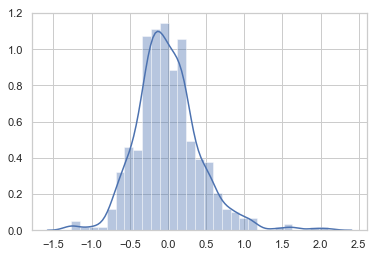

In [23]:
sns.set(style = 'whitegrid')
sns.distplot(residuals)

### Generally we use transformation when the residual plots vary from the normal distribution.

##### Let's see few more transformation techniques

##### log transform

In [24]:
df2 = bos.copy()
df_final1 = df2.transform(lambda X: np.log(X))
df_final1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-5.064036,2.890372,0.837248,-inf,-0.619897,1.883275,4.177459,1.408545,0.000000,5.690359,2.727853,5.983684,1.605430,3.178054
1,-3.600502,-inf,1.955860,-inf,-0.757153,1.859574,4.368181,1.602836,0.693147,5.488938,2.879198,5.983684,2.212660,3.072693
2,-3.601235,-inf,1.955860,-inf,-0.757153,1.971996,4.112512,1.602836,0.693147,5.488938,2.879198,5.973377,1.393766,3.546740
3,-3.430523,-inf,0.779325,-inf,-0.780886,1.945624,3.824284,1.802073,1.098612,5.402677,2.928524,5.977949,1.078410,3.508556
4,-2.672924,-inf,0.779325,-inf,-0.780886,1.966693,3.992681,1.802073,1.098612,5.402677,2.928524,5.983684,1.673351,3.589059


##### Inverse transform

In [25]:
df_final1 = df2.transform(lambda X: 1/X)
df_final1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,158.227848,0.055556,0.432900,inf,1.858736,0.152091,0.015337,0.244499,1.000000,0.003378,0.065359,0.002520,0.200803,0.041667
1,36.616624,inf,0.141443,inf,2.132196,0.155739,0.012674,0.201325,0.500000,0.004132,0.056180,0.002520,0.109409,0.046296
2,36.643459,inf,0.141443,inf,2.132196,0.139179,0.016367,0.201325,0.500000,0.004132,0.056180,0.002546,0.248139,0.028818
3,30.892802,inf,0.458716,inf,2.183406,0.142898,0.021834,0.164957,0.333333,0.004505,0.053476,0.002534,0.340136,0.029940
4,14.482259,inf,0.458716,inf,2.183406,0.139919,0.018450,0.164957,0.333333,0.004505,0.053476,0.002520,0.187617,0.027624


##### exponential transform

In [26]:
df2 = bos.copy()
df_final1 = df2.transform(lambda X: np.exp(X))
df_final1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,1.006340,6.565997e+07,10.074425,1.0,1.712578,716.945624,2.070142e+28,59.739892,2.718282,3.557678e+128,4.412712e+06,2.352230e+172,145.474382,2.648912e+10
1,1.027686,1.000000e+00,1176.148034,1.0,1.598395,614.617424,1.844313e+34,143.609814,7.389056,1.256796e+105,5.375784e+07,2.352230e+172,9320.765132,2.403039e+09
2,1.027666,1.000000e+00,1176.148034,1.0,1.598395,1319.489238,3.430780e+26,143.609814,7.389056,1.256796e+105,5.375784e+07,4.016995e+170,56.260911,1.174948e+15
3,1.032900,1.000000e+00,8.846306,1.0,1.580909,1094.442084,7.774765e+19,429.318900,20.085537,2.590449e+96,1.322229e+08,2.430141e+171,18.915846,3.202106e+14
4,1.071490,1.000000e+00,8.846306,1.0,1.580909,1270.289365,3.457490e+23,429.318900,20.085537,2.590449e+96,1.322229e+08,2.352230e+172,206.437974,5.265750e+15
